In [2]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from scipy.misc import imread, imresize
import numpy as np

In [37]:
clf = joblib.load('model.pkl') 

img = imread('digitRecognizer_app/output.png', mode='L')
invertedImg = np.invert(img)

resizedImg = imresize(invertedImg,(28,28))

#increase contrast
resizedImg[resizedImg>(255*.3)] = 255

list(clf.predict(resizedImg.reshape(1,-1)))

[8.0]

In [17]:
import io

io.StringIO()

In [20]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
import cv2

ret, thresh = cv2.threshold(resizedImg, 200, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

NameError: name 'resizedImg' is not defined

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline



In [276]:
img = imread('digitRecognizer_app_copy/output3.png', mode='L')


In [224]:
img = cv2.cvtColor( img, cv2.COLOR_RGB2GRAY )


error: /Users/travis/miniconda3/conda-bld/opencv_1492076215451/work/opencv-3.2.0/modules/imgproc/src/color.cpp:9748: error: (-215) scn == 3 || scn == 4 in function cvtColor


In [241]:
img.shape

(280, 560, 4)

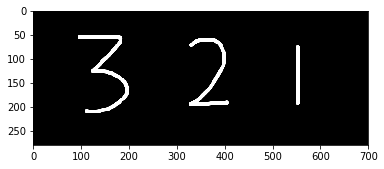

In [277]:
plt.imshow(np.invert(img), cmap='gray')

In [27]:
import cv2

ret, thresh = cv2.threshold(img, 170, 255, 300)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [20]:
x,y,w,h = cv2.boundingRect(contours)

TypeError: points is not a numpy array, neither a scalar

In [28]:
contours

[array([[[ 70, 219]],
 
        [[ 72, 219]]], dtype=int32), array([[[ 61, 218]],
 
        [[ 62, 219]]], dtype=int32), array([[[ 79, 216]],
 
        [[ 78, 217]],
 
        [[ 77, 217]],
 
        [[ 76, 218]],
 
        [[ 75, 218]],
 
        [[ 76, 218]],
 
        [[ 77, 217]],
 
        [[ 78, 217]],
 
        [[ 79, 216]],
 
        [[ 80, 216]]], dtype=int32), array([[[ 84, 214]],
 
        [[ 83, 215]],
 
        [[ 82, 215]],
 
        [[ 83, 215]]], dtype=int32), array([[[ 86, 213]]], dtype=int32), array([[[ 88, 212]]], dtype=int32), array([[[ 90, 211]],
 
        [[ 91, 211]]], dtype=int32), array([[[ 93, 210]],
 
        [[ 94, 210]]], dtype=int32), array([[[ 96, 209]],
 
        [[ 97, 209]]], dtype=int32), array([[[101, 207]],
 
        [[100, 208]],
 
        [[ 99, 208]],
 
        [[100, 208]]], dtype=int32), array([[[ 81, 207]]], dtype=int32), array([[[ 65, 207]],
 
        [[ 64, 208]],
 
        [[ 64, 209]],
 
        [[ 61, 212]],
 
        [[ 61, 213]],
 
    

In [75]:
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
resizedImg = img[:,:]
resizedImg[resizedImg>(255*.3)] = 255
resizedImg[resizedImg<(255*.3)] = 0

#_,thresh = cv2.threshold(resizedImg,254,255,cv2.THRESH_BINARY_INV) 
#im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

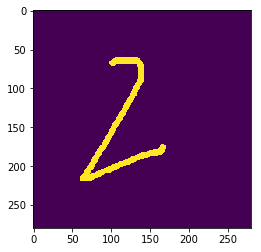

In [72]:
plt.imshow(im2)

In [274]:
def findEdges(img,xStart):
    started = False
    leftX = 0
    rightX = 0
    for x in range(xStart,img.shape[1]):
        if((np.sum(img[:,x]) != 0) and (started == False)):
            #print('here')
            leftX = x
            started = True
        if((np.sum(img[:,x]) == 0) and (started == True)):
            rightX = x
            break
            
    started = False
    topY = 0
    bottomY = 0
#     if(rightX <1):
#         return((0,0,0,0))
    
    for y in range(0,img.shape[0]):
        if((np.sum(img[y,leftX:rightX+1]) != 0) and (started == False)):
            #print('here')
            topY = y
            started = True
        if((np.sum(img[y,leftX:rightX+1]) == 0) and (started == True)):
            bottomY = y
            break
            
    return((leftX,rightX, topY, bottomY))
        
            

In [278]:
findEdges(np.invert(img),0)

(93, 202, 50, 214)

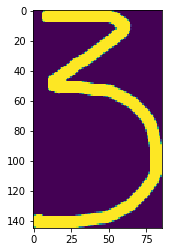

In [268]:
plt.imshow(np.invert(img)[61:206,98:184])

In [279]:
findEdges(np.invert(img),202)

(325, 409, 55, 200)

In [273]:
img.shape[1]

700

In [280]:
findEdges(np.invert(img),409)

(548, 557, 72, 196)

In [197]:
def breakDownToMultipleImages(img):
    lstDigits = []
    xStart = 0
    
    while(True):
        edges = findEdges(img,xStart)
        if np.sum(edges) < 1:
            break
        else:
            leftX,rightX, topY, bottomY = edges
            lstDigits.append(img[topY:bottomY, leftX:rightX])
            xStart = rightX
    
    return(lstDigits)
        

In [148]:
lst = getDigitImages(np.invert(img))

(40, 53, 72, 182)
(125, 226, 78, 184)
(0, 0, 0, 0)


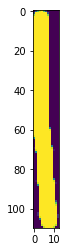

In [150]:
plt.imshow(lst[0])

In [201]:
def addPadding(img):
    j =np.max(img.shape) * 1.8
    #print(j)
    
    paddingY = int((j - img.shape[0]) // 2)
    
    topBottomPadding = np.zeros((paddingY, img.shape[1]))
    tempImg = np.concatenate((topBottomPadding, img, topBottomPadding),axis =0)
    
    paddingX = int((j - tempImg.shape[1]) // 2)
    
    leftRightPadding = np.zeros((tempImg.shape[0], paddingX))
    
    #print(leftRightPadding.shape)
    
    tempImg = np.concatenate((leftRightPadding, tempImg, leftRightPadding),axis =1)
    
    imgDim = np.min(tempImg.shape)
    
    tempImg = tempImg[:imgDim,:imgDim]
    
    return(tempImg)
    

198.0
(198, 92)


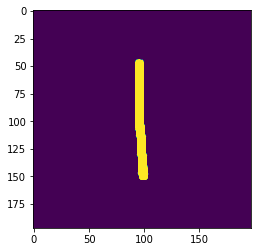

In [193]:
plt.imshow(addPadding(lst[0]))

In [285]:
def getDigitImages(img):
    imgs = breakDownToMultipleImages(img)
    imgs2 = [ imresize(addPadding(im), (28,28)) for im in imgs]
    return(imgs2)
        
lst  = getDigitImages(np.invert(img))

#plt.imshow(lst[1], cmap='gray')
#plt.imshow(lst[1])
lst[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          4,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [206]:
clf = joblib.load('model.pkl') 

In [288]:
t = lst[0]
t[t>100] = 255
t[t<=100] = 0

clf.predict(t.reshape(1,-1))

array([ 3.])